In [441]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings('ignore')

## Background

### Problem Statement

The company wants to re-evaluate their performance and services. This information can help them identify what must be done to improve.

The steps to start should be:
1. Which customer is more often to call customer care.
2. How many items delivered that reached on time.
3. Find what mode of shipment is the most effective for delivering items.
4. Analyze the customer satisfaction and what affects them.




## Data Dictionary : 

The dataset contains information below:

- ID: ID number of customers.
- Warehouse block: The company has a big warehouse that is divided into blocks (A-E).
- Mode of shipment: The company ships the products in multiple ways (Ship, Flight, and
  Road).
- Customer care calls: The number of calls made from inquiries for inquiries of the
  shipment.
- Customer rating: Rate from each customer. 1 is the lowest, and 5 is the highest.
- Cost of the product: Cost of the product in US Dollars.
- Prior purchases: The number of previous purchases.
- Product importance: The company has categorized the product in various parameters
  (low, medium, high).
- Gender: Male and female.
- Discount offered: Discount offered on that specific product.
- Weight in gms: The weight in grams.
- Reached on time: 1 indicates that the product has not arrived on time, and 0 indicates the
  product has arrived on time.

## Data Understanding

In [442]:
df=pd.read_csv('Online Retail Shipping.csv')
display(df.head(), df.tail())

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0
10998,10999,D,Ship,2,5,155,5,low,F,6,1639,0


In [443]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [444]:
df.describe(include='all')

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999,10999,10999.000000,10999.000000,10999.000000,10999.000000,10999,10999,10999.000000,10999.000000,10999.000000
unique,NaN,5,3,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN
top,NaN,F,Ship,NaN,NaN,NaN,NaN,low,F,NaN,NaN,NaN
freq,NaN,3666,7462,NaN,NaN,NaN,NaN,5297,5545,NaN,NaN,NaN
mean,5500.00000,NaN,NaN,4.054459,2.990545,210.196836,3.567597,NaN,NaN,13.373216,3634.016729,0.596691
std,3175.28214,NaN,NaN,1.141490,1.413603,48.063272,1.522860,NaN,NaN,16.205527,1635.377251,0.490584
min,1.00000,NaN,NaN,2.000000,1.000000,96.000000,2.000000,NaN,NaN,1.000000,1001.000000,0.000000
25%,2750.50000,NaN,NaN,3.000000,2.000000,169.000000,3.000000,NaN,NaN,4.000000,1839.500000,0.000000
50%,5500.00000,NaN,NaN,4.000000,3.000000,214.000000,3.000000,NaN,NaN,7.000000,4149.000000,1.000000
75%,8249.50000,NaN,NaN,5.000000,4.000000,251.000000,4.000000,NaN,NaN,10.000000,5050.000000,1.000000


In [445]:
df.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [446]:
pd.set_option('display.max_colwidth', 1)
# Unique data of each column
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

table1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
table1Desc

,Column Name,Number of Unique,Unique Sample
0,ID,10999,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, ...]"
1,Warehouse_block,5,"[D, F, A, B, C]"
2,Mode_of_Shipment,3,"[Flight, Ship, Road]"
3,Customer_care_calls,6,"[4, 2, 3, 5, 6, 7]"
4,Customer_rating,5,"[2, 5, 3, 1, 4]"
5,Cost_of_the_Product,215,"[177, 216, 183, 176, 184, 162, 250, 233, 150, 164, 189, 232, 198, 275, 152, 227, 143, 239, 145, 161, 156, 211, 251, 225, 172, 234, 266, 257, 223, 149, 137, 181, 215, 269, 139, 174, 151, 210, 169, 160, 190, 141, 165, 170, 203, 246, 238, 193, 221, 179, 105, 261, 202, 109, 158, 231, 206, 187, 230, 113, 180, 132, 217, 197, 185, 278, 229, 186, 286, 175, 219, 213, 235, 271, 144, 218, 263, 168, 265, 205, 252, 222, 220, 147, 200, 224, 247, 280, 157, 207, 237, 264, 248, 191, 146, 135, 98, 97, 114, 112, ...]"
6,Prior_purchases,8,"[3, 2, 4, 6, 5, 7, 10, 8]"
7,Product_importance,3,"[low, medium, high]"
8,Gender,2,"[F, M]"
9,Discount_offered,65,"[44, 59, 48, 10, 46, 12, 3, 11, 29, 32, 1, 43, 45, 6, 36, 18, 38, 51, 2, 28, 24, 31, 61, 22, 4, 62, 16, 56, 15, 9, 40, 37, 41, 17, 64, 52, 49, 39, 14, 33, 21, 13, 23, 26, 57, 7, 35, 8, 5, 53, 55, 47, 65, 25, 50, 60, 20, 19, 63, 58, 34, 54, 27, 42, 30]"


Some informations gathered from describe :
- `ID` column is useless and the column can be dropped.
- There are no missing data in the dataset.
- The `Warehouse_block` consist of 5 unique data which is A-D and F, we need to change the F to E.
- The `Gender` is displayed as F and M, we should change it to Female and Male.
- The `Discount_offered` value is too random, we need to summarize the value
- All the data columns are in the correct type.


## Data Cleaning

First, we have to drop the uneccesary columns in our dataset. 

In [447]:
df = df.drop(['ID'], axis=1)

Now we want to change the `Warehouse_block` value from F to E

In [448]:
# Replace F to E in the Warehouse_block column
df.loc[df['Warehouse_block']=='F','Warehouse_block']='E'
df['Warehouse_block'].value_counts()

Warehouse_block
E    3666
D    1834
A    1833
B    1833
C    1833
Name: count, dtype: int64

Fix the `Gender` Column

In [449]:
# Replace F and M to Female and Male in Gender Column
df.loc[df['Gender']=='F','Gender']='Female'
df.loc[df['Gender']=='M','Gender']='Male'
df['Gender'].value_counts()

Gender
Female    5545
Male      5454
Name: count, dtype: int64

Check `Customer_rating` with value above 4

The average of `Customer_rating` is 2.99 so we want to use rating 4 as a parameter

In [450]:
# Making a new Column name Target which contain data from Customer_rating 
def rating_value(x):
    if x >= 4:
        return 1
    else:
        return 0

df['Target'] = df['Customer_rating'].apply(rating_value)
df

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Target
0,D,Flight,4,2,177,3,low,Female,44,1233,1,0
1,E,Flight,4,5,216,2,low,Male,59,3088,1,1
2,A,Flight,2,2,183,4,low,Male,48,3374,1,0
3,B,Flight,3,3,176,4,medium,Male,10,1177,1,0
4,C,Flight,2,2,184,3,medium,Female,46,2484,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,A,Ship,4,1,252,5,medium,Female,1,1538,1,0
10995,B,Ship,4,1,232,5,medium,Female,6,1247,0,0
10996,C,Ship,5,4,242,5,low,Female,4,1155,0,1
10997,E,Ship,5,2,223,6,medium,Male,2,1210,0,0


In [451]:
df_ct=pd.crosstab(df['Customer_rating'],df['Product_importance'])
df_ct['Total']=df_ct.sum(axis=1)
df_ct.sort_values('Total',ascending=False)

Product_importance,high,low,medium,Total
Customer_rating,,,,
3,184,1054,1001,2239
1,186,1117,932,2235
4,193,1060,936,2189
5,186,1051,934,2171
2,199,1015,951,2165


Changing the unplausible `Discount_offered` value

Because the company would give a discount value by multiples of 10, so we will change the value that do not included in multiples of 10

In [452]:
df[df['Discount_offered'] < 10]['Discount_offered']

6        3
12       1
16       6
22       2
33       4
        ..
10994    1
10995    6
10996    4
10997    2
10998    6
Name: Discount_offered, Length: 7492, dtype: int64

Because the quantity of value below 10 is too many, we will replace the value below 10 with 10 

In [453]:
df.loc[df['Discount_offered'] < 10, 'Discount_offered'] = 10
df

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Target
0,D,Flight,4,2,177,3,low,Female,44,1233,1,0
1,E,Flight,4,5,216,2,low,Male,59,3088,1,1
2,A,Flight,2,2,183,4,low,Male,48,3374,1,0
3,B,Flight,3,3,176,4,medium,Male,10,1177,1,0
4,C,Flight,2,2,184,3,medium,Female,46,2484,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,A,Ship,4,1,252,5,medium,Female,10,1538,1,0
10995,B,Ship,4,1,232,5,medium,Female,10,1247,0,0
10996,C,Ship,5,4,242,5,low,Female,10,1155,0,1
10997,E,Ship,5,2,223,6,medium,Male,10,1210,0,0


Now we continue to the other value

In [454]:
df.loc[(df['Discount_offered'] > 10) & (df['Discount_offered'] < 20), 'Discount_offered']=20
df.loc[(df['Discount_offered'] > 20) & (df['Discount_offered'] < 30), 'Discount_offered']=30
df.loc[(df['Discount_offered'] > 30) & (df['Discount_offered'] < 40), 'Discount_offered']=40
df.loc[(df['Discount_offered'] > 40) & (df['Discount_offered'] < 50), 'Discount_offered']=50
df.loc[(df['Discount_offered'] > 50) & (df['Discount_offered'] < 60), 'Discount_offered']=60
df.loc[(df['Discount_offered'] > 60) & (df['Discount_offered'] < 66), 'Discount_offered']=60
df

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Target
0,D,Flight,4,2,177,3,low,Female,50,1233,1,0
1,E,Flight,4,5,216,2,low,Male,60,3088,1,1
2,A,Flight,2,2,183,4,low,Male,50,3374,1,0
3,B,Flight,3,3,176,4,medium,Male,10,1177,1,0
4,C,Flight,2,2,184,3,medium,Female,50,2484,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,A,Ship,4,1,252,5,medium,Female,10,1538,1,0
10995,B,Ship,4,1,232,5,medium,Female,10,1247,0,0
10996,C,Ship,5,4,242,5,low,Female,10,1155,0,1
10997,E,Ship,5,2,223,6,medium,Male,10,1210,0,0


### Checking Outliers

Checking any outliers in `Customer_care_calls`

In [455]:
Customer_care_calls = df['Customer_care_calls']
q1 = Customer_care_calls.describe()['25%']
q3 = Customer_care_calls.describe()['75%']
iqr = q3 - q1
print(f"Customer_care_calls IQR:\nQ1 = {q1}\nQ3 = {q3}\nIQR = {iqr}")

lower = q1-(1.5*iqr)
upper = q3+(1.5*iqr)
print(f"Lower limit: {lower}\nUpper limit: {upper}")

Customer_care_calls IQR:
Q1 = 3.0
Q3 = 5.0
IQR = 2.0
Lower limit: 0.0
Upper limit: 8.0


In [456]:
outlier = df[(Customer_care_calls > upper) | (Customer_care_calls < lower)]
display(outlier['Customer_care_calls'])
print(f"Number of outliers: {outlier['Customer_care_calls'].count()}")

Series([], Name: Customer_care_calls, dtype: int64)

Number of outliers: 0


Check any outliers in `Cost_of_the_Product`

In [457]:
Cost_of_the_Product = df['Cost_of_the_Product']
q1 = Cost_of_the_Product.describe()['25%']
q3 = Cost_of_the_Product.describe()['75%']
iqr = q3 - q1
print(f"Cost_of_the_Product  IQR:\nQ1 = {q1}\nQ3 = {q3}\nIQR = {iqr}")

lower = q1-(1.5*iqr)
upper = q3+(1.5*iqr)
print(f"Lower limit: {lower}\nUpper limit: {upper}")

Cost_of_the_Product  IQR:
Q1 = 169.0
Q3 = 251.0
IQR = 82.0
Lower limit: 46.0
Upper limit: 374.0


In [458]:
outlier = df[(Cost_of_the_Product > upper) | (Cost_of_the_Product < lower)]
display(outlier['Cost_of_the_Product'])
print(f"Number of outliers: {outlier['Cost_of_the_Product'].count()}")

Series([], Name: Cost_of_the_Product, dtype: int64)

Number of outliers: 0


Check any outliers in `Discount_offered`

In [459]:
Discount_offered = df['Discount_offered']
q1 = Discount_offered.describe()['25%']
q3 = Discount_offered.describe()['75%']
iqr = q3 - q1
print(f"Discount_offered  IQR:\nQ1 = {q1}\nQ3 = {q3}\nIQR = {iqr}")

lower = q1-(1.5*iqr)
upper = q3+(1.5*iqr)
print(f"Lower limit: {lower}\nUpper limit: {upper}")

Discount_offered  IQR:
Q1 = 10.0
Q3 = 10.0
IQR = 0.0
Lower limit: 10.0
Upper limit: 10.0


In [460]:
outlier = df[(Discount_offered > upper) | (Discount_offered < lower)]
display(outlier['Discount_offered'])
print(f"Number of outliers: {outlier['Discount_offered'].count()}")

0       50
1       60
2       50
4       50
5       20
        ..
3129    20
3130    50
3131    60
3132    30
3133    60
Name: Discount_offered, Length: 2647, dtype: int64

Number of outliers: 2647


There seems to be 2444 outliers data in `Discount_offered` but it is plausible so we will use the data

In [461]:
df_ct=pd.crosstab(df['Customer_rating'],df['Discount_offered'])
df_ct['Total']=df_ct.sum(axis=1)
df_ct.sort_values('Total',ascending=False)

Discount_offered,10,20,30,40,50,60,Total
Customer_rating,,,,,,,
3,1723,101,93,75,94,153,2239
1,1703,86,94,102,99,151,2235
4,1670,110,65,98,99,147,2189
5,1635,97,88,104,112,135,2171
2,1621,102,101,91,103,147,2165


## Cleaned Data

In [462]:
list_cleaned = []
for col in df.columns :
    list_cleaned.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)])

df_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=list_cleaned)
print(df.shape)
df_desc.set_index('dataFeatures')

(10999, 12)


,dataType,null,unique,uniqueSample
dataFeatures,,,,
Warehouse_block,object,0,5,"[C, E]"
Mode_of_Shipment,object,0,3,"[Ship, Flight]"
Customer_care_calls,int64,0,6,"[7, 5]"
Customer_rating,int64,0,5,"[4, 1]"
Cost_of_the_Product,int64,0,215,"[217, 212]"
Prior_purchases,int64,0,8,"[3, 4]"
Product_importance,object,0,3,"[low, medium]"
Gender,object,0,2,"[Male, Female]"
Discount_offered,int64,0,6,"[40, 60]"


- `ID` columns has been dropped
- `Warehouse_block` value 'F' has been changed to 'E'
- `Gender` value 'F' and 'M' has been changed to 'Female' and 'Male'
- `Discount_offered` value has been changed to multiples of 10 so that it become more plausible
- `Target` column has been added and contains value 1 and 0 from `Customer_rating`

### Now we can continue to the next step

## Data Analysis

The first question than we can answer is 'Which customer is more often to call customer care?'

In [463]:
# Finding which gender is more often to call customer care
df_ct=pd.crosstab(df['Gender'],df['Customer_care_calls'])
df_ct['Total']=df_ct.sum(axis=1)
df_ct.sort_values('Total',ascending=False).head()

Customer_care_calls,2,3,4,5,6,7,Total
Gender,,,,,,,
Female,329,1628,1780,1168,516,124,5545
Male,309,1589,1777,1160,497,122,5454


Turns out, Female Customer is more often to call customer care rather than Male Customer per items delivered.

Now we want to find out how much items `Reached.on.Time_Y.N`

In [464]:
# Check data distribution in Reached.on.Time_Y.N
df['Reached.on.Time_Y.N'].value_counts()

Reached.on.Time_Y.N
1    6563
0    4436
Name: count, dtype: int64

Remember than 0 means the items arrived on time so only 4436 items arrived on time

Now we want to find out which `Mode_of_Shipment` is the most effective

In [465]:
df_ct=pd.crosstab(df['Mode_of_Shipment'],df['Reached.on.Time_Y.N'])
df_ct['Total']=df_ct.sum(axis=1)
df_ct.sort_values('Total',ascending=False).head()

Reached.on.Time_Y.N,0,1,Total
Mode_of_Shipment,,,
Ship,3003,4459,7462
Flight,708,1069,1777
Road,725,1035,1760


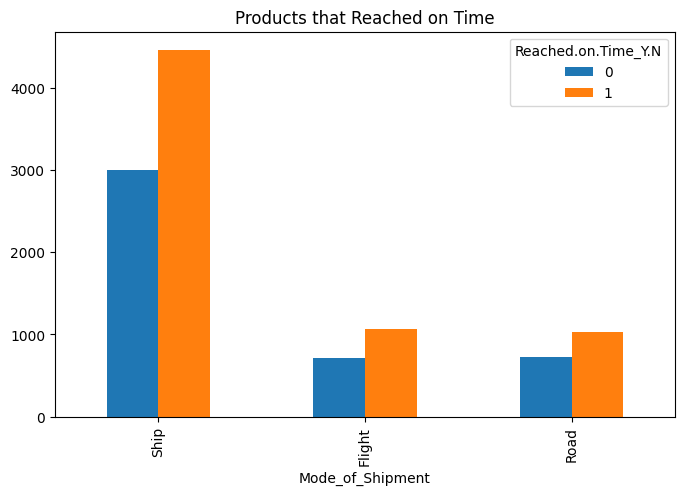

In [466]:
df_ct.sort_values(1, ascending=False).head().drop(columns='Total'
      ).plot(
          kind='bar',
          figsize=(8,5), 
          title='Products that Reached on Time'
      )
      
plt.show()

It is shown that the company mostly uses ship as their mode of shipment, but all 3 modes of shipment failed to deliver product on time for most of the time. 

- The percentage of delivered item on time by Ship is 40,24%
- The percentage of delivered item on time by Flight is 39,84%
- The percentage of delivered item on time by Road is 41.19%

So we can conclude that the most effective way of shipping the item is by Road 

#### For the final question, 'analyze the customer satisfaction and what affects them'

In [467]:
df['Customer_rating'].value_counts()

Customer_rating
3    2239
1    2235
4    2189
5    2171
2    2165
Name: count, dtype: int64

In [468]:
#Finding the mode of customer care calls for high, low and medium product
df_ct=pd.crosstab(df['Product_importance'],df['Customer_care_calls'])
df_ct['Total']=df_ct.sum(axis=1)
df_ct.sort_values('Total',ascending=False)

Customer_care_calls,2,3,4,5,6,7,Total
Product_importance,,,,,,,
low,329,1426,1714,1129,558,141,5297
medium,247,1459,1556,997,393,102,4754
high,62,332,287,202,62,3,948


From the data above, we can conclude that :
- it is shown that for low and medium product importance, the most calls is 4 times per delivered items.
- For high product importance, the most calls is 3 times per delivered items



In [469]:
df_ct=pd.crosstab(df['Product_importance'],df['Customer_rating'])
df_ct['Total']=df_ct.sum(axis=1)
df_ct.sort_values('Total',ascending=False)

Customer_rating,1,2,3,4,5,Total
Product_importance,,,,,,
low,1117,1015,1054,1060,1051,5297
medium,932,951,1001,936,934,4754
high,186,199,184,193,186,948


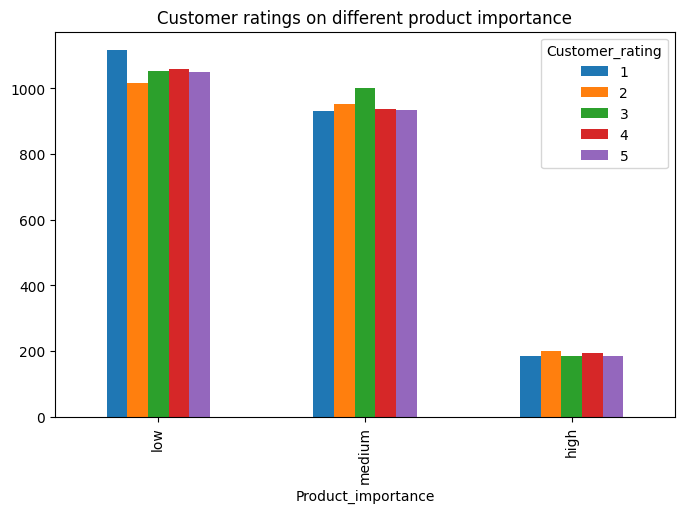

In [470]:
df_ct.sort_values(1, ascending=False).head().drop(columns='Total'
      ).plot(
          kind='bar',
          figsize=(8,5), 
          title='Customer ratings on different product importance'
      )
      
plt.show()

From the bar chart above, we know that:
- In low product importance, most customer give 1 as a rating
- In medium product importance, most customer give 3 as a rating
- In hight product importance, most customer give 2 as a rating

In [471]:
df_ct=pd.crosstab(df['Reached.on.Time_Y.N'],df['Customer_rating'])
df_ct['Total']=df_ct.sum(axis=1)
df_ct.sort_values('Total',ascending=False)

Customer_rating,1,2,3,4,5,Total
Reached.on.Time_Y.N,,,,,,
1,1313,1273,1357,1303,1317,6563
0,922,892,882,886,854,4436


In [472]:
df_ct=pd.crosstab(df['Reached.on.Time_Y.N'],df['Target'])
df_ct['Total']=df_ct.sum(axis=1)
df_ct.sort_values('Total',ascending=False)

Target,0,1,Total
Reached.on.Time_Y.N,,,
1,3943,2620,6563
0,2696,1740,4436


In [473]:
from scipy.stats import normaltest
stats, pval=normaltest(df['Customer_rating'])
if pval<=0.05:
    print('The sample data is not normally distributed') #Ha
else: 
    print('The sample data is normally distributed') #H0 

The sample data is not normally distributed


Check whether there is a correlation between `Prior_purchases` and `Target`

In [474]:
from scipy.stats import mannwhitneyu
stats,pval=mannwhitneyu(*[df[df['Target']==i]['Prior_purchases'] for i in df['Target'].unique()])
if pval <= 0.05:
    print('Reject H0')
else:
    print('Fail to reject H0')

Fail to reject H0


Check whether there is a correlation between `Weight_in_gms` and `Target`

In [475]:
from scipy.stats import mannwhitneyu
stats,pval=mannwhitneyu(*[df[df['Target']==i]['Weight_in_gms'] for i in df['Target'].unique()])
if pval <= 0.05:
    print('Reject H0')
else:
    print('Fail to reject H0')

Fail to reject H0


Check whether there is a correlation between `Customer_care_calls` and `Target`

In [476]:
from scipy.stats import mannwhitneyu
stats,pval=mannwhitneyu(*[df[df['Target']==i]['Customer_care_calls'] for i in df['Target'].unique()])
if pval <= 0.05:
    print('Reject H0')
else:
    print('Fail to reject H0')

Fail to reject H0


Check whether there is a correlation between `Reached.on.Time_Y.N` and `Target`

In [477]:
from statsmodels.stats.proportion import proportions_ztest
df_ct=pd.crosstab(df['Reached.on.Time_Y.N'],df['Target'])

stats, pval=proportions_ztest(df_ct[1],df_ct.sum(axis=1)) 
if pval<=0.05:
    print('Reject H0')
else:
    print('Fail to reject H0')

Fail to reject H0


Check whether there is a correlation between `Discount_offered` and `Target`

In [478]:
from scipy.stats import mannwhitneyu
stats,pval=mannwhitneyu(*[df[df['Target']==i]['Discount_offered'] for i in df['Target'].unique()])
if pval <= 0.05:
    print('Reject H0')
else:
    print('Fail to reject H0')

Fail to reject H0


Check whether there is a correlation between `Cost_of_the_Product` and `Target`

In [479]:
from scipy.stats import mannwhitneyu
stats,pval=mannwhitneyu(*[df[df['Target']==i]['Cost_of_the_Product'] for i in df['Target'].unique()])
if pval <= 0.05:
    print('Reject H0')
else:
    print('Fail to reject H0')

Fail to reject H0


Check whether there is a correlation between `Product_importance` and `Target`

In [480]:
df_ct= pd.crosstab(df['Target'],df['Product_importance'])
score, pval, dof,exp=chi2_contingency(df_ct)
if pval<=0.05:
    print('Reject H0')
else:
    print('Fail to reject H0')

Fail to reject H0


Check whether there is a correlation between `Gender` and `Target`

In [481]:
df_ct= pd.crosstab(df['Gender'],df['Target'])
score, pval, dof,exp=chi2_contingency(df_ct)
if pval<=0.05:
    print('Reject H0')
else:
    print('Fail to reject H0')

Fail to reject H0


## Conclusion & Reccomendation

From the analysis that has been done, we can make a few conclusion:

- Female customer is more likely to call the customer care to ask about the items that is being delivered rather than Male customer.
- Only 4436 items arrived on time from a total of 10999 items. That means only 40.33% of items.
- Road is the most efficient mode of shipment to deliver items.
- None of the variable affects or have any correlation with the customer rating.

For the recommendation:
1. To increase the efficiency of delivering items, use Road for the main mode of shipment.
2. A 40% of items arrived on time could mean that we were understaffed so we could hire more manpower to help with the delivery
3. The customer rating seems to be affected with other variable that we cannot measure such as the condition of the customer, for that we cannot know what the variables are. But we can try to improve our customer services for the future and hopefully it will help for the rating in the future. 


In [485]:
df_temp = df.groupby(by=['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating', 'Gender', 'Prior_purchases', 'Weight_in_gms','Reached.on.Time_Y.N'])
df_temp.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Target
0,D,Flight,4,2,177,3,low,Female,50,1233,1,0
1,E,Flight,4,5,216,2,low,Male,60,3088,1,1
2,A,Flight,2,2,183,4,low,Male,50,3374,1,0
3,B,Flight,3,3,176,4,medium,Male,10,1177,1,0
4,C,Flight,2,2,184,3,medium,Female,50,2484,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,A,Ship,4,1,252,5,medium,Female,10,1538,1,0
10995,B,Ship,4,1,232,5,medium,Female,10,1247,0,0
10996,C,Ship,5,4,242,5,low,Female,10,1155,0,1
10997,E,Ship,5,2,223,6,medium,Male,10,1210,0,0


In [486]:
df.to_csv('export_data_retail_shipping.csv', index=False)